<center><h1>Preliminary analysis of Basis Peak HRM data</h1></center>

<img src="larsinblack.jpg" width=200px>

Load stuff

In [1]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
options(jupyter.plot_mimetypes = 'image/png')

In [32]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(reshape2)

In [65]:
# Basis Peak Data
f = "/g/steinmetz/brooks/ph/data/basispeak/bodymetrics_2011-01-01T00-00-00_2016-04-19T13-27-00.csv"
hr = read.table(f, sep = ",", header = T)
# change date format
hr$date = as.POSIXct(hr$date, tz = "UTC")
# add additional query columns
hr$year = year(hr$date)
hr$month = month(hr$date, label = T)
hr$yday = yday(hr$date)
hr$day = wday(hr$date, label = T)
hr$hour = hour(hr$date)
hr$minute = minute(hr$date)
hr$h.m = hr$hour + hr$minute/60

In [79]:
# Qardio Data
f2 = "/g/steinmetz/brooks/ph/data/qardio/04222016_user_measurements.csv"
bp = read.table(f2, sep = ",", header = T)
# change date format
bp$DATE = as.POSIXct(bp$DATE, tz = "UTC")
# round dates to nearest minute to match hr data
bp$DATE = round_date(bp$DATE, unit = "minute")

In [89]:
# combine hr and bp
combined_df = merge(hr, bp, by.x = "date", by.y = "DATE", all.x = T)

In [90]:
head(combined_df)

,date,calories,gsr,heart.rate,skin.temp,steps,year,month,yday,day,hour,minute,h.m,SYS,DIA,BPM,NOTE,IHB
1,2015-04-01 20:04:00,0.4,NA,NA,NA,0,2015,Apr,91,Wed,20,4,20.06667,NA,NA,NA,NA,NA
2,2015-04-01 20:05:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,5,20.08333,NA,NA,NA,NA,NA
3,2015-04-01 20:06:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,6,20.1,NA,NA,NA,NA,NA
4,2015-04-01 20:07:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,7,20.11667,NA,NA,NA,NA,NA
5,2015-04-01 20:08:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,8,20.13333,NA,NA,NA,NA,NA
6,2015-04-01 20:09:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,9,20.15,NA,NA,NA,NA,NA


In [5]:
head(hr)

,date,calories,gsr,heart.rate,skin.temp,steps,year,month,yday,day,hour,minute,h.m
1,2015-04-01 20:04:00,0.4,NA,NA,NA,0,2015,Apr,91,Wed,20,4,20.06667
2,2015-04-01 20:05:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,5,20.08333
3,2015-04-01 20:06:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,6,20.1
4,2015-04-01 20:07:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,7,20.11667
5,2015-04-01 20:08:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,8,20.13333
6,2015-04-01 20:09:00,1.2,NA,NA,NA,0,2015,Apr,91,Wed,20,9,20.15


In [6]:
cat(dim(hr)[1], "measurements")

499834 measurements

In [7]:
per.day = hr %>% group_by(year,yday) %>% summarise(m.measure = length(heart.rate))
cat(mean(per.day$m.measure), "measurements per day")

1411.96 measurements per day

## Basic data plots

Distribution of data

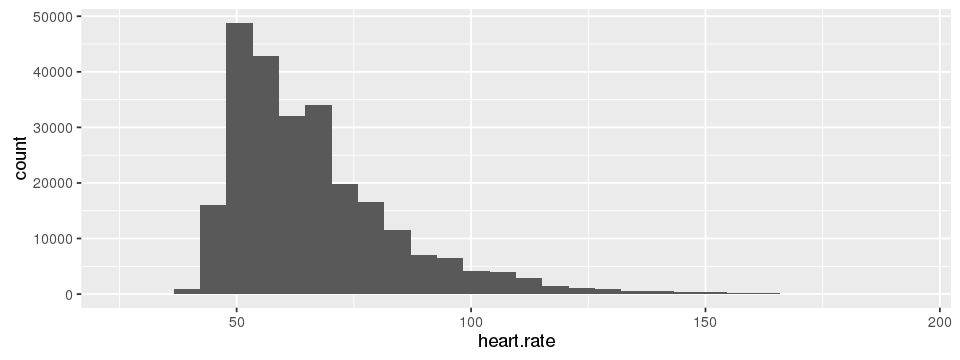

In [8]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
p <- ggplot(hr, aes(x= heart.rate)) + geom_histogram(na.rm=T, bins=30)
p

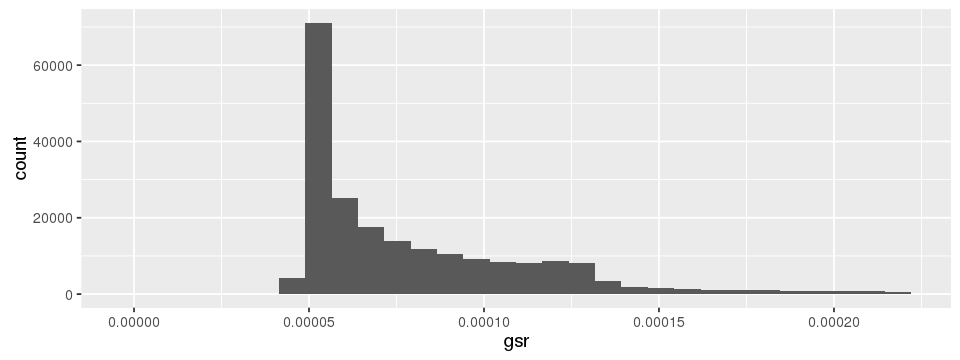

In [9]:
qs = quantile(hr$gsr, probs = c(0,.75), na.rm = T)
p <- ggplot(hr %>% filter(gsr >= qs[1], gsr <= qs[2]), aes(x= gsr)) + geom_histogram(bins=30)
p

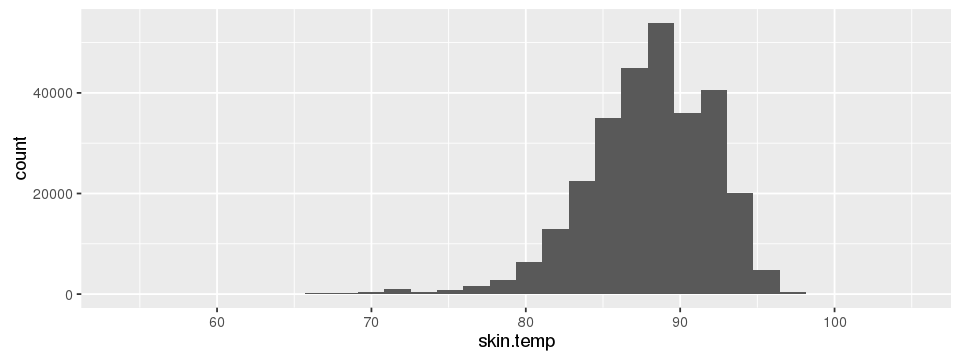

In [10]:
qs = quantile(hr$skin.temp, probs = c(0,.75), na.rm = T)
#p <- ggplot(hr %>% filter(gsr >= qs[1], gsr <= qs[2]), aes(x= gsr)) + geom_histogram()
p <- ggplot(hr, aes(x= skin.temp)) + geom_histogram(bins=30, na.rm=T)
p

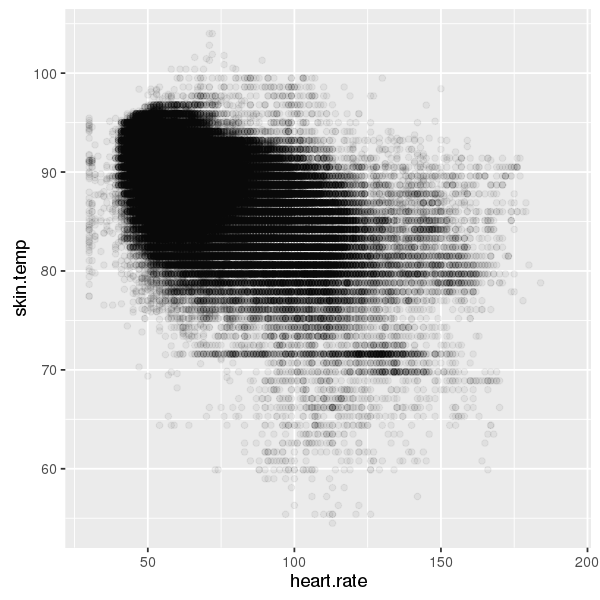

In [11]:
options(repr.plot.width = 5)
options(repr.plot.height = 5)
p <- ggplot(hr, aes(x = heart.rate, y = skin.temp)) + geom_point(na.rm = T, alpha = 1/20)
p

In [12]:
cat("Correlation, heart rate and skin temp =", cor(x = hr$heart.rate,y =  hr$skin.temp, use = "pair"))

Correlation, heart rate and skin temp = -0.5384988

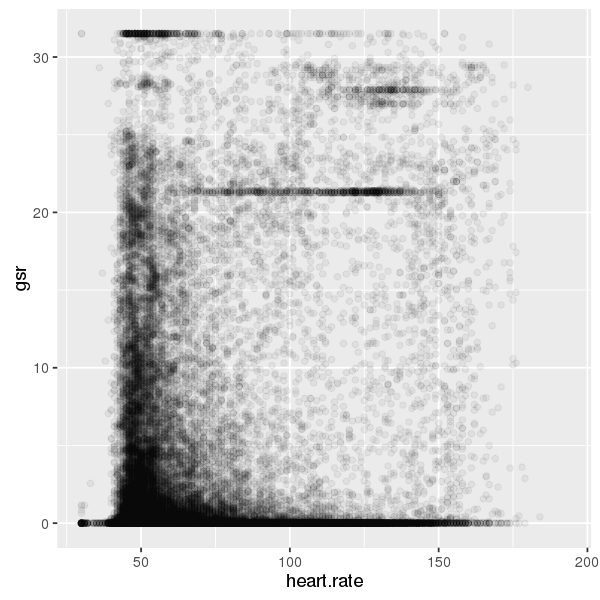

In [13]:
p <- ggplot(hr, aes(x = heart.rate, y = gsr)) + geom_point(na.rm = T, alpha = 1/20)
p

In [58]:
start_date = as.POSIXct("2016-02-01", tz = "UTC")
end_date = as.POSIXct("2016-02-27", tz = "UTC")

In [59]:
toplot = melt(hr %>% filter(date>=start_date,date<=end_date), 
              id.vars = c("yday","h.m"), measure.vars = c("gsr","heart.rate","skin.temp"))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


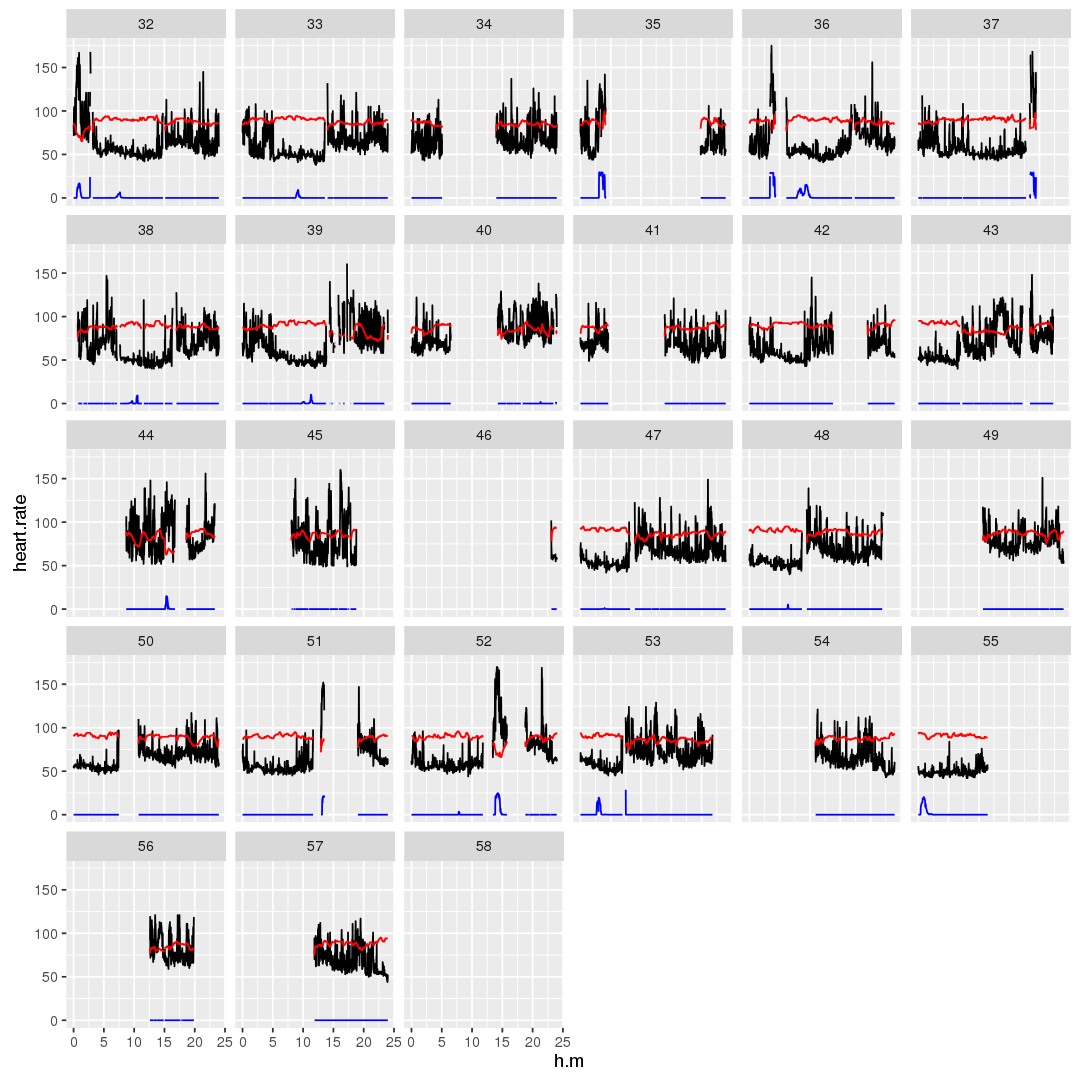

In [61]:
options(repr.plot.width = 9)
options(repr.plot.height = 9)
p <- ggplot(hr %>% filter(date>=start_date,date<=end_date), aes(x = h.m)) + geom_line(aes(y = heart.rate), na.rm = T)
p + geom_line(aes(y = gsr), colour = "blue") + geom_line(aes(y = skin.temp), colour = "red") + facet_wrap( ~ yday)

Warning message:
: Computation failed in `stat_smooth()`:
'Calloc' could not allocate memory (18446744071585746944 of 8 bytes)

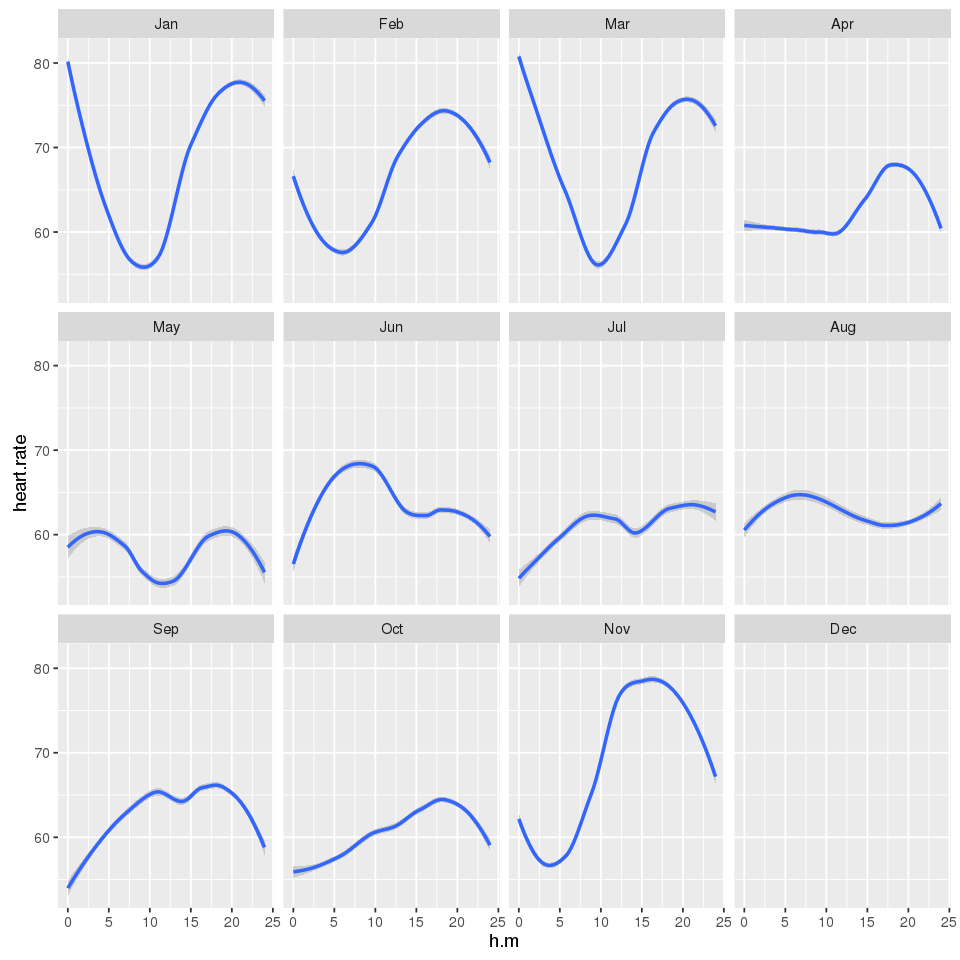

In [16]:
options(repr.plot.width = 8)
options(repr.plot.height = 8)
p <- ggplot(hr, aes(x= h.m, y=heart.rate)) + geom_smooth(method="loess", na.rm = T) 
p + facet_wrap( ~ month)

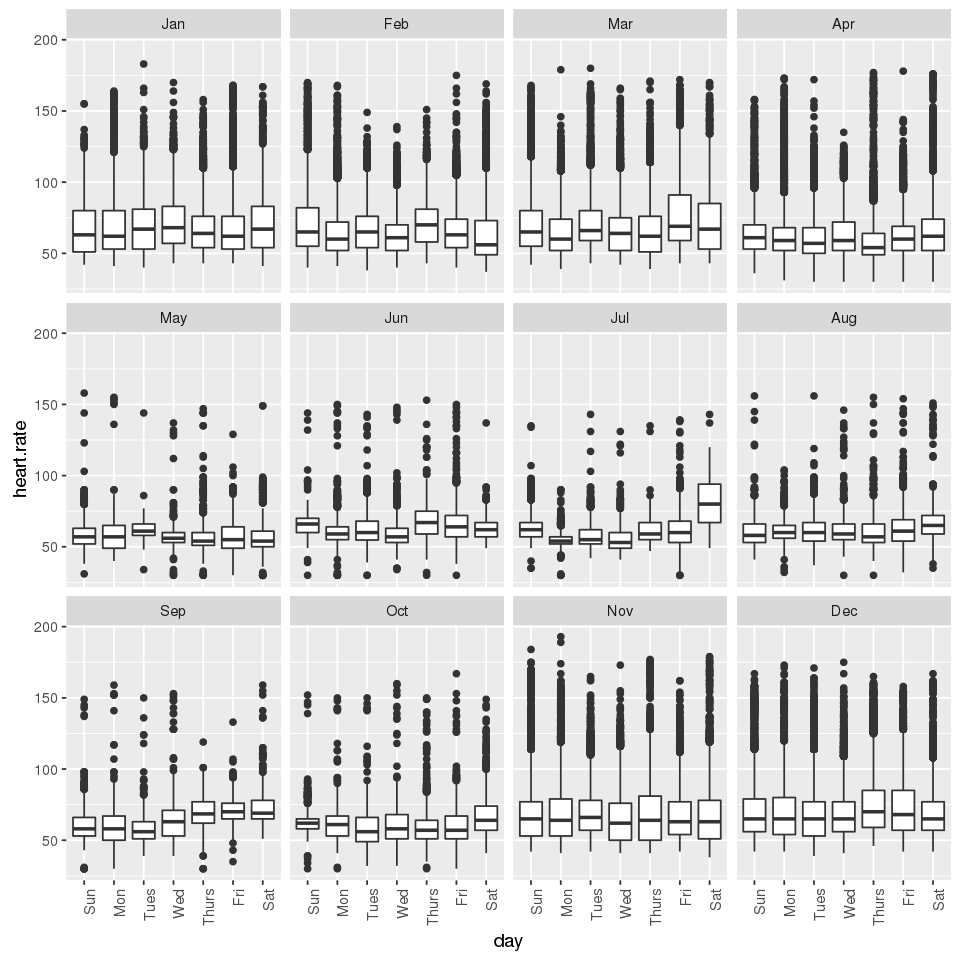

In [17]:
p <- ggplot(hr, aes(x= day, y=heart.rate)) + geom_boxplot(na.rm=T)
p + facet_wrap( ~ month) + theme(axis.text.x = element_text(angle = 90, hjust = 1))